This project is all of my work for the Kaggle January 2021 RMSE competition. This project was purely done for fun and to practice using some regression algorithms that i haven't used before like Random Forests and Gradient Boost.

Link to dataset: https://www.kaggle.com/c/tabular-playground-series-jan-2021/overview

###### Import the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, average_precision_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import os
import joblib
import time
import pickle
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(color_codes=True)
sns.set(font_scale=2)

Read the data

In [2]:
train_path = 'D:/Machine Learning Datasets/Kaggle Competitions/tabular-playground-series-jan-2021/train.csv'
df = pd.read_csv(train_path)

test_path = 'D:/Machine Learning Datasets/Kaggle Competitions/tabular-playground-series-jan-2021/test.csv'
test_df = pd.read_csv(test_path)

Looking at the top few columns of the training and testing data set

In [3]:
df.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [4]:
test_df.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
1,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
2,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
3,7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
4,10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cont1   300000 non-null  float64
 2   cont2   300000 non-null  float64
 3   cont3   300000 non-null  float64
 4   cont4   300000 non-null  float64
 5   cont5   300000 non-null  float64
 6   cont6   300000 non-null  float64
 7   cont7   300000 non-null  float64
 8   cont8   300000 non-null  float64
 9   cont9   300000 non-null  float64
 10  cont10  300000 non-null  float64
 11  cont11  300000 non-null  float64
 12  cont12  300000 non-null  float64
 13  cont13  300000 non-null  float64
 14  cont14  300000 non-null  float64
 15  target  300000 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 36.6 MB


In [6]:
df.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,249825.145857,0.506873,0.497898,0.521557,0.515683,0.502022,0.526515,0.487890,0.525163,0.459857,0.520532,0.483926,0.506877,0.553442,0.503713,7.905661
std,144476.732562,0.203976,0.228159,0.200770,0.233035,0.220701,0.217909,0.181096,0.216221,0.196685,0.201854,0.220082,0.218947,0.229730,0.208238,0.733071
min,1.000000,-0.082263,-0.031397,0.020967,0.152761,0.276377,0.066166,-0.097666,0.217260,-0.240604,-0.085046,0.083277,0.088635,0.029950,0.166367,0.000000
25%,124656.500000,0.343078,0.319170,0.344096,0.294935,0.284108,0.356163,0.346600,0.341486,0.330832,0.375465,0.300474,0.310166,0.350472,0.308673,7.329367
50%,249738.500000,0.484005,0.553209,0.551471,0.482880,0.451733,0.470988,0.466825,0.483460,0.416843,0.458877,0.441916,0.486599,0.487707,0.431845,7.940571
75%,374836.250000,0.643789,0.731263,0.648315,0.748705,0.670660,0.694043,0.581292,0.685250,0.575041,0.700292,0.679128,0.694453,0.768479,0.712653,8.470084
max,499999.000000,1.016227,0.859697,1.006955,1.010402,1.034261,1.043858,1.066167,1.024427,1.004114,1.199951,1.022620,1.049025,0.977845,0.868506,10.267569


Look for missing or bad data

In [7]:
pd.DataFrame(df.isna().mean(), columns=['Percentage Missing'])

,Percentage Missing
id,0.0
cont1,0.0
cont2,0.0
cont3,0.0
cont4,0.0
cont5,0.0
cont6,0.0
cont7,0.0
cont8,0.0
cont9,0.0


There is no missing data in the data set

# Visualizations

First, i will look at boxplots of all the data to see if there are any outliers we may want to remove

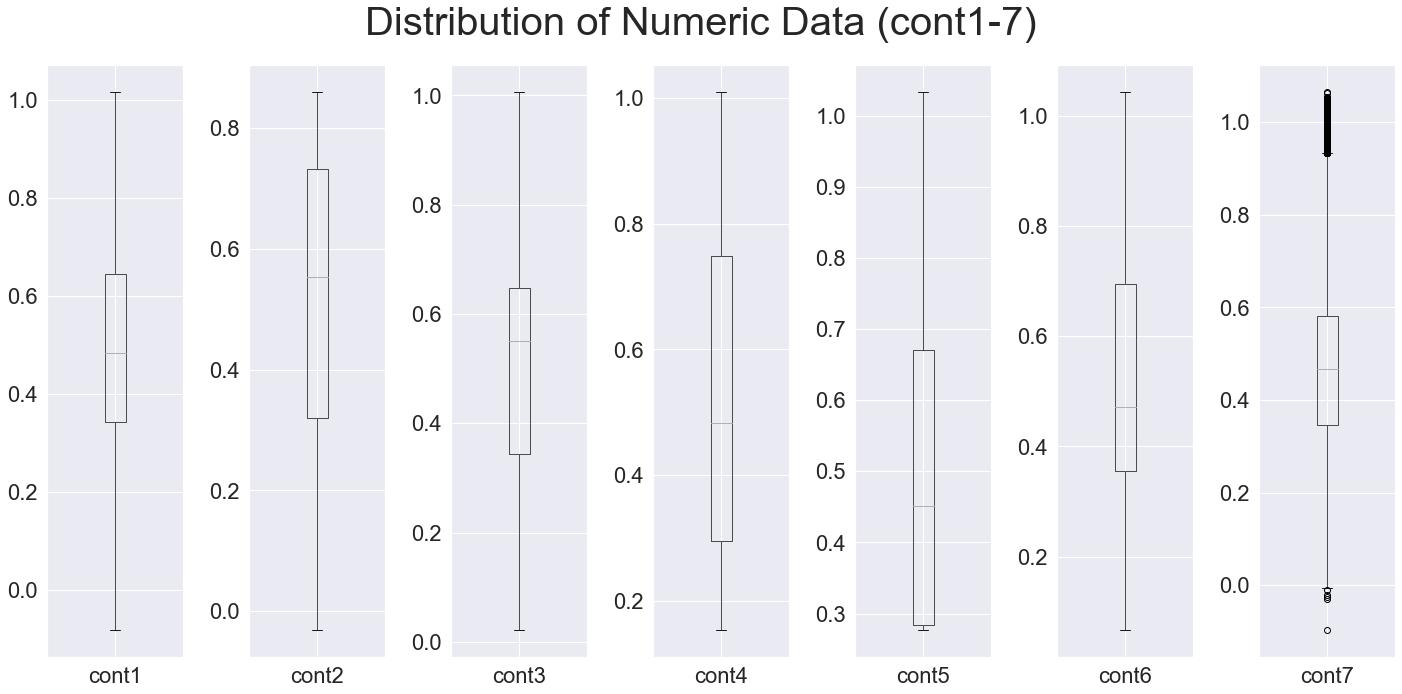

In [8]:
sns.set(font_scale=2)
cat_columns = df.columns[1:8]
plt.subplots_adjust(wspace=1, hspace=1, right=2)
i = 1
for col in cat_columns:
    plt.subplot(1, len(cat_columns), i)
    df.boxplot([col])
    i += 1
plt.tight_layout()
plt.suptitle('Distribution of Numeric Data (cont1-7)', fontsize=40)
plt.subplots_adjust(top=0.9);

The only columns with outliers is cont7

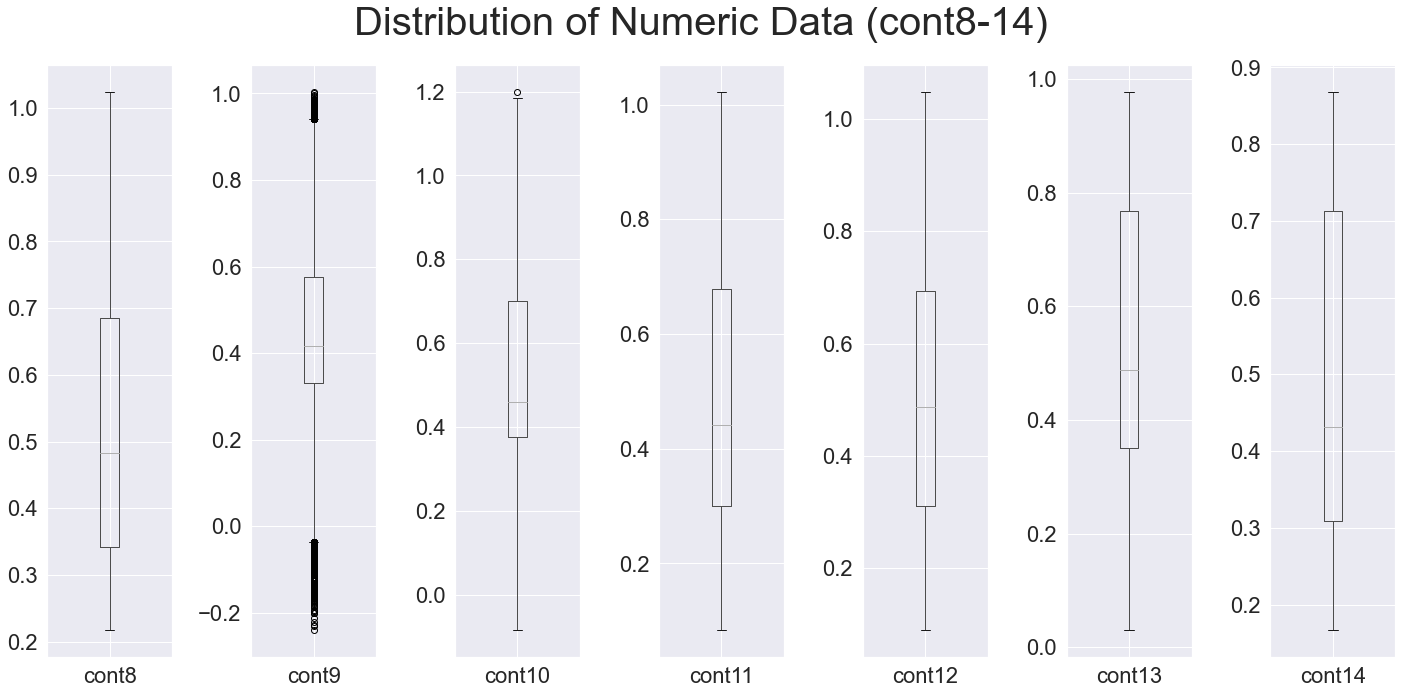

In [9]:
sns.set(font_scale=2)
cat_columns = df.columns[8:-1]
plt.subplots_adjust(wspace=1, hspace=1, right=2)
i = 1
for col in cat_columns:
    plt.subplot(1, len(cat_columns), i)
    df.boxplot([col])
    i += 1
plt.tight_layout()
plt.suptitle('Distribution of Numeric Data (cont8-14)', fontsize=40)
plt.subplots_adjust(top=0.9);

There are only 2 columns with outliers, cont9 and cont10

<b> Counting the outliers </b>

In [10]:
# This method shows the outliers and removes them if need be
def outliers(df, column, l_remove=False, u_remove=False):
    # Get the quantiles
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    # Get the IQR
    IQR = Q3 - Q1
    # Get the lower and upper range
    l_outliers = (df[column] < (Q1 - 1.5 * IQR))
    u_outliers = (df[column] > (Q3 + 1.5 * IQR))
    # Get the index of the outliers
    l_outliers_index = l_outliers.loc[l_outliers == True].index
    u_outliers_index = u_outliers.loc[u_outliers == True].index
    # Print out the number of outliers
    print(column)
    print('There are {} lower outliers'.format(len(l_outliers_index)))
    print('There are {} upper outliers'.format(len(u_outliers_index)))
    
    # If selecting to remove
    if l_remove:
        df.drop(index=l_outliers_index, inplace=True)
        print('The new shape of the dataframe is {}'.format(df.shape))
        # Check to make sure it dropped them
        l_outliers = (df[column] < (Q1 - 1.5 * IQR))
        l_outliers_index = l_outliers.loc[l_outliers == True].index
        print('There are {} lower outliers'.format(len(l_outliers_index)))
    if u_remove:
        df.drop(index=u_outliers_index, inplace=True)
        print('The new shape of the dataframe is {}'.format(df.shape))
        u_outliers = (df[column] > (Q3 + 1.5 * IQR))
        u_outliers_index = u_outliers.loc[u_outliers == True].index
        print('There are {} upper outliers'.format(len(u_outliers_index)))

In [11]:
outliers(df, 'cont7')
outliers(df, 'cont9')
outliers(df, 'cont10')

cont7
There are 5 lower outliers
There are 6246 upper outliers
cont9
There are 336 lower outliers
There are 1345 upper outliers
cont10
There are 0 lower outliers
There are 1 upper outliers


Because there are only 5 outliers towards the minimum in cont7, i will remove those. <br>
I will not remove any of the outliers in cont9 because there is a significant amount of data that is concidered an outlier. <br>
I will remove the one outlier in cont10.

In [12]:
outliers(df, 'cont7', l_remove=True)
outliers(df, 'cont10', u_remove=True)

cont7
There are 5 lower outliers
There are 6246 upper outliers
The new shape of the dataframe is (299995, 16)
There are 0 lower outliers
cont10
There are 0 lower outliers
There are 1 upper outliers
The new shape of the dataframe is (299994, 16)
There are 0 upper outliers


Next, i will create a confusion matrix to visualize if there is any correlations between the variables

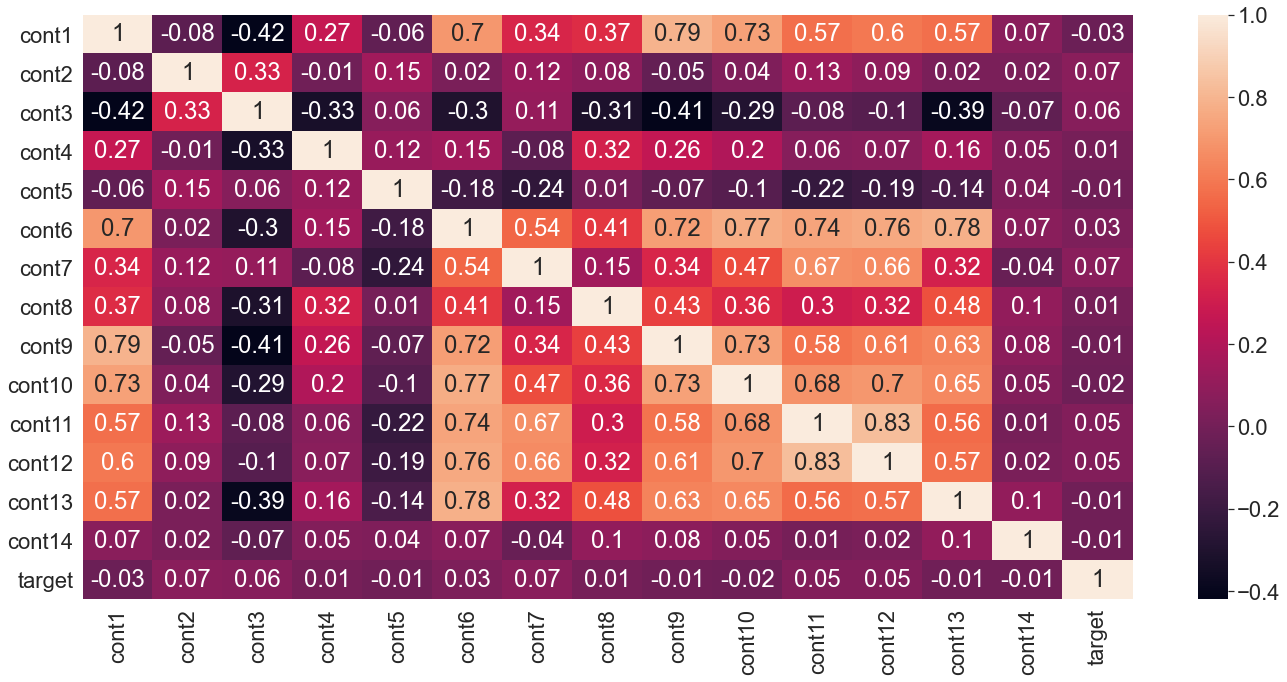

In [13]:
corrMatrix = round(df[df.columns[1:]].corr(),2)
sns.heatmap(corrMatrix, annot=True)
plt.tight_layout();

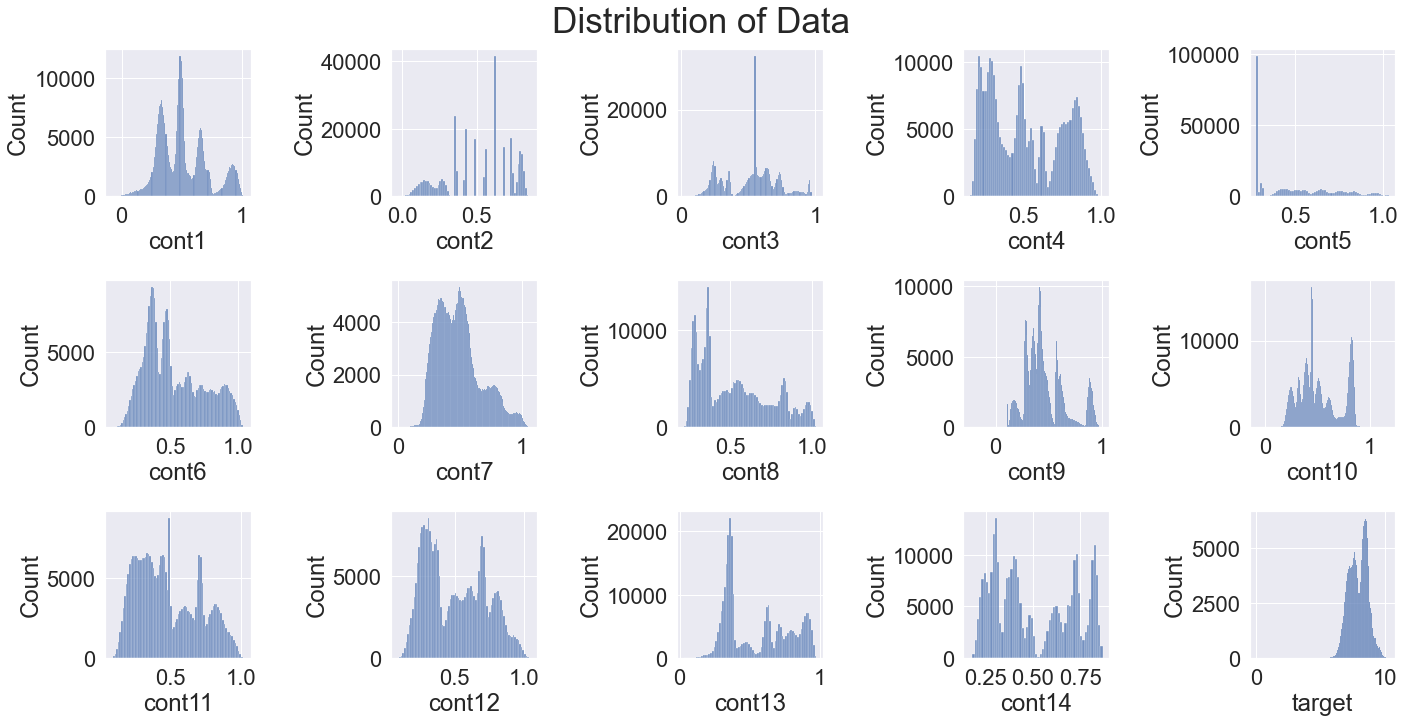

In [14]:
fig, axs = plt.subplots(ncols=5, nrows=3)
sns.histplot(df, x='cont1', ax=axs[0,0])
sns.histplot(df, x='cont2', ax=axs[0,1])
sns.histplot(df, x='cont3', ax=axs[0,2])
sns.histplot(df, x='cont4', ax=axs[0,3])
sns.histplot(df, x='cont5', ax=axs[0,4])
sns.histplot(df, x='cont6', ax=axs[1,0])
sns.histplot(df, x='cont7', ax=axs[1,1])
sns.histplot(df, x='cont8', ax=axs[1,2])
sns.histplot(df, x='cont9', ax=axs[1,3])
sns.histplot(df, x='cont10', ax=axs[1,4])
sns.histplot(df, x='cont11', ax=axs[2,0])
sns.histplot(df, x='cont12', ax=axs[2,1])
sns.histplot(df, x='cont13', ax=axs[2,2])
sns.histplot(df, x='cont14', ax=axs[2,3])
sns.histplot(df, x='target', ax=axs[2,4])
plt.tight_layout()
plt.suptitle('Distribution of Data',y=1.02, fontsize=35);

# Machine Learning

First, i will save some variables that will be used throughout the report

In [4]:
# Save the testing data
test_df_data = test_df[test_df.columns[test_df.columns != 'id']].values
# Path to save the submissions
path = 'D:/Machine Learning Datasets/Kaggle Competitions/tabular-playground-series-jan-2021/Submissions/'
# Path to save the models 
model_path = 'C:/Users/dlili/OneDrive/Documents/python_code/Machine Learning Competitions/Tabular-Playground-Series-Jan-2021/'


Next, i will be defining some functions that i will use later in the report

In [5]:
# for repeatability
np.random.seed(0)   

# Compute the RMSE 
def rmse(predicted, actual):
    return np.sqrt(((predicted - actual)**2).mean())

# This function will save the submission results for me
def get_and_save_predictions(test_pred, test_df, submission_name, path):
    # Get the test id's
    test_id = test_df['id'].values.reshape(-1,1)
    # Get the test predictions
    test_predictions = test_pred.reshape(-1,1)
    # Combine and convert the arrays to a dataframe
    submission_df = pd.DataFrame(np.hstack((test_id, test_predictions)), columns=['id','target'])
    # Convert the ID columns to an integer
    submission_df['id'] = submission_df['id'].astype(int)

    # Check to make sure the submission doesn't already exist
    csv_name = submission_name + '.csv'
    path += csv_name
    if os.path.isdir(path) is False:
        # Save the dataframe
        submission_df.to_csv(path, index=False)
        print(submission_name +' has successfully be created at ' + path)
    else:
        print('CSV Creation Failed')

# Load the saved models
def load_model(path):
    try:
        return joblib.load(path)
    except:
        print('Failed to load the model')

# Save the model
def save_model(model, path, model_name):
    try:
        joblib.dump(model, path, model_name)
    except:
        print('Failed to save the model')

def save_model_pickle(model, path):
    try:
        pickle.dump(model, open(path, 'wb'))
    except:
        print('Failed to save the model')

def load_model_pickle(path):
    try:
        return pickle.load(open(path, 'rb'))
    except:
        print('Failed to load the model')
        
    

Finally, i split the testing dataframe and offer scaled and unscaled data. I also create a smaller subset to improve the speeds of tuning hyper-parameters.

In [7]:
predictors = df.columns[1:-1] # Grab all the predictor variables 
target = 'target'

X = df[predictors].values
y = df[target].values

# Scale the data with there respective Z-scores 
scaler = StandardScaler()
scaler.fit(X,y) # Scale the whole data set

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)
# 10% of the data will be testing data. This is more than enough since the training set has 300,000 observations


######------- Creating mini data sets -------######
# The mini sets will have a 20% training set

### Mini Data Set 1 ###
# Create a mini subset of the data with 10,000 
indexes = np.random.choice(y.size, size=10000, replace=False)
X_mini1 = X[indexes]
y_mini1 = y[indexes]

X_train_mini1, X_test_mini1, y_train_mini1, y_test_mini1 = train_test_split(X_mini1, y_mini1, test_size=0.20, random_state=0) 

### Mini Data Set 2 ### 
# Create a mini subset of the data with 50,000 
indexes = np.random.choice(y.size, size=50000, replace=False)
X_mini2 = X[indexes]
y_mini2 = y[indexes]

X_train_mini2, X_test_mini2, y_train_mini2, y_test_mini2 = train_test_split(X_mini2, y_mini2, test_size=0.20, random_state=0) 

### Mini Data Set 3 ### 
# Create a mini subset of the data with 100,000 
indexes = np.random.choice(y.size, size=100000, replace=False)
X_mini3 = X[indexes]
y_mini3 = y[indexes]

X_train_mini3, X_test_mini3, y_train_mini3, y_test_mini3 = train_test_split(X_mini3, y_mini3, test_size=0.20, random_state=0) 

<h3> Linear Regression (Model 1) </h3>

_note: we can laod the saved model instead of re-running/training. Uncommment out the box below and comment out the box below that_

In [8]:
### Load the model instead of running it again
# model_path = 'C:/Users/dlili/OneDrive/Documents/python_code/Machine Learning Competitions/Tabular-Playground-Series-Jan-2021/Regression_Model1.sav'
# reg = load_model(model_path)

In [9]:
# Instantiate the model
reg = LinearRegression()
# Train the model on the training data
reg.fit(X_train, y_train)
# Make predictions on the test data
y_predict = reg.predict(X_test)

print('Test RMSE {}'.format(rmse(y_test, y_predict)))

Test RMSE 0.7247497036551528


Now, i will make the predictions on the test data set, save the results, and save the model

In [15]:
# Predict on the test data set
y_predict_test = reg.predict(test_df_data)
# Save the predictions
get_and_save_predictions(y_predict_test, test_df, 'Submission1', path)
# Save the model
save_model_pickle(reg, 'Linear_Regression_Model1.pkl')

Submission1 has successfully be created at D:/Machine Learning Datasets/Kaggle Competitions/tabular-playground-series-jan-2021/Submissions/Submission1.csv


From doing nothing special, i was able to get an RMSE score of <b>0.72782</b> when submitting this in kaggle.

<h3> Linear Regression (Model 2) </h3>

Next, i will be using polynomial features to reduce the RMSE of 0.28 from the testing data.

In [114]:
rmse_list = []

predictors = df.columns[1:-1] 
target = 'target'

X = df[predictors].values
y = df[target]
 
# Loop through the degrees 1 through 5 to see which performs the best
# I will not go higher than 5 because we will run the risk of overfitting the model
for i in range(1,5):
    pf = PolynomialFeatures(degree=i, include_bias=False)
    X_poly = pf.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

    reg = LinearRegression()
    reg.fit(X_train, y_train)

    y_predict = reg.predict(X_test)
    RMSE = rmse(y_test, y_predict)
    print('Degree:',i)
    print('Root Mean Square Error: {:.4f}'.format(RMSE))
    rmse_list.append(RMSE)

# Get the degree of the lowest RMSE
h_degree = (np.where(min(rmse_list) == rmse_list)[0][0] + 1)
# Get the lowest RMSE
h_rmse = min(rmse_list)
print('\nThe lowest RMSE score is {:.4f} with degree {}'.format(h_rmse, h_degree))

Degree: 1
Root Mean Square Error: 0.7248
Degree: 2
Root Mean Square Error: 0.7179
Degree: 3
Root Mean Square Error: 0.7144
Degree: 4
Root Mean Square Error: 0.7153

The lowest RMSE score is 0.7144 with degree 3


I will use degree: 3 of the polynomial features to see where that brings our next RMSE score too.

In [31]:
pf = PolynomialFeatures(degree=3, include_bias=False)
X_poly = pf.fit_transform(StandardScaler().fit_transform(X))

### Load the model instead of re-running everything
# reg = load_model('Regression_Model2.sav')

# Split the data
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

reg = LinearRegression()
reg.fit(X_train_poly, y_train)

y_predict = reg.predict(X_test_poly)

print('Test RMSE {}'.format(rmse(y_test, y_predict)))

Test RMSE 0.7144044293106632


The previous linear regression model RMSE was <b>0.7254283161796667</b> 

In [32]:
difference = 0.7254283161796667 - 0.7144044293106632
print('The difference between the first and second model is +{:.6f}'.format(difference))

The difference between the first and second model is +0.011024


Save the data and model

In [26]:
y_predict_test = reg.predict(test_df_data)
get_and_save_predictions(y_predict_test, test_df, 'Submission2', path)
save_model(model=reg, path=model_path, model_name='Regression_Model2.sav')

The new RMSE score was <b>0.71695</b>

<h3> Random Forest (Model 1) </h3>

In [35]:
## Load the model instead of re-running everything
# forest = joblib.load('RandomForest_Model1.sav')

# Create and train the model
forest = RandomForestRegressor(n_estimators=1000, criterion='mse', n_jobs=-1, random_state=0, verbose=0)
forest.fit(X_train_raw, y_train_raw)

# Make predictions
y_predict = forest.predict(X_test)

print('Test RMSE {}'.format(rmse(y_test, y_predict)))

Test RMSE 0.7044783067731264


Next, i will look to see if any feature are important or not

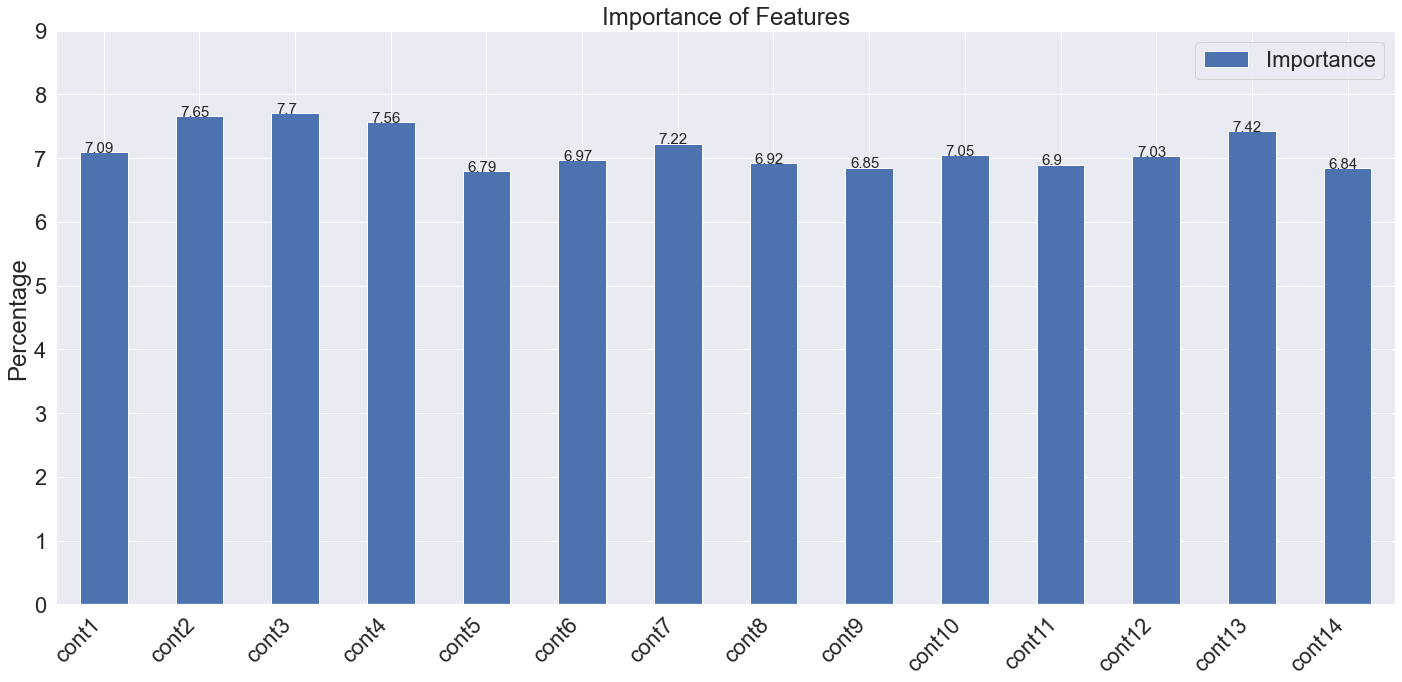

In [36]:
importance = forest.feature_importances_ * 100

ax = pd.DataFrame(importance, index=predictors, columns=['Importance']).plot.bar()
plt.title('Importance of Features')
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Percentage')
plt.yticks(range(10))
# Add the numbers to the graph
for i, col in enumerate(ax.patches):
    plt.text(col.get_x()+0.05, col.get_height(), round(importance[i],2), fontsize=15)
plt.tight_layout();

Because this is a regression problem, we would expect most features to be equal

In [39]:
### Submissions
y_predict_test = forest.predict(test_df_data)
get_and_save_predictions(y_predict_test, test_df, 'Submission7', path)

# Save the model
filename = 'RandomForest_Model1.sav'
joblib.dump(forest, model_path+filename)

Submission7 has successfully be created at D:/Machine Learning Datasets/Kaggle Competitions/tabular-playground-series-jan-2021/Submissions/Submission7.csv


['C:/Users/dlili/OneDrive/Documents/python_code/Machine Learning Competitions/Tabular-Playground-Series-Jan-2021/RandomForest_Model1.sav']

The new RMSE score was <b>0.70735</b>

In [46]:
# Deleting the forest to save memory
#del forest

<h3> Random Forest (Model 2) </h3>

Next, i will use a random search with cross validation to improve the models hyperparameters. I am choosing to do a random search instead of a grid search because it will take less time to train so i will be able to use more of the rows

In [15]:


params = {'bootstrap': [True, False],
          'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_leaf': [1, 2, 4],
          'min_samples_split': [2, 5, 10],
          'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

grid_search = RandomizedSearchCV(estimator = RandomForestRegressor(criterion='mse'), param_distributions = params,
                             cv = 3, n_jobs = -1, verbose = 2, scoring='neg_root_mean_squared_error')

In [16]:
# Train the grid
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  4.0min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='neg_root_mean_squared_error', verbose=2)

In [17]:
grid_search.best_params_

{'n_estimators': 1400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

In [18]:
y_predict = grid_search.predict(X_test)
print('Average Difference between predictions and target {}'.format((y_predict-y_test).mean()))

Average Difference between predictions and target -0.0322820425241196


In [24]:
### Submissions
y_predict_test = grid_search.predict(test_df[test_df.columns[test_df.columns != 'id']].values)
get_and_save_predictions(y_predict_test, test_df, 'Submission5', path)

# Save the model
filename = 'RandomForest_Model3.sav'
joblib.dump(grid_search, model_path+filename)

Submission5 has successfully be created at D:/Machine Learning Datasets/Kaggle Competitions/tabular-playground-series-jan-2021/Submissions/Submission5.csv


['C:/Users/dlili/OneDrive/Documents/python_code/Machine Learning Competitions/Tabular-Playground-Series-Jan-2021/RandomForest_Model3.sav']

The new RMSE score was <b>0.74012</b>

<h3> Random Forest (Model 2.1) <em> Increasing the sample size </em> </h3>

In [75]:
predictors = df.columns[1:-1] 
target = 'target'

X = df[predictors].values
y = df[target]

indexes = np.random.choice(y.size, size=50000, replace=False)
X_mini = X[indexes]
y_mini = y[indexes]

X_train, X_test, y_train, y_test = train_test_split(X_mini, y_mini, test_size=0.2, random_state=0)

In [77]:
start = time.time()
print('Time of start',time.strftime('%I'),':',time.strftime('%M'),':', time.strftime('%S'))

from sklearn.model_selection import RandomizedSearchCV

params = {'bootstrap': [True, False],
          'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_leaf': [1, 2, 4],
          'min_samples_split': [2, 5, 10],
          'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

grid_search = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = params,
                             cv = 3, n_jobs = -1, verbose = 2, scoring='neg_root_mean_squared_error')

# Train the model
grid_search.fit(X_train, y_train)

end = time.time()
print('Time taken in seconds',(end-start))

### Submissions
y_predict_test = grid_search.predict(test_df[test_df.columns[test_df.columns != 'id']].values)
get_and_save_predictions(y_predict_test, test_df, 'Submission6', path)

# Save the model
filename = 'RandomForest_Model4.sav'
joblib.dump(grid_search, model_path+filename)

Time of start 03 : 49 : 32
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 36.0min remaining: 10.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 40.3min finished


Time taken in seconds 2583.0080959796906
Submission6 has successfully be created at D:/Machine Learning Datasets/Kaggle Competitions/tabular-playground-series-jan-2021/Submissions/Submission6.csv


['C:/Users/dlili/OneDrive/Documents/python_code/Machine Learning Competitions/Tabular-Playground-Series-Jan-2021/RandomForest_Model4.sav']

The new RMSE score was <b>0.73537</b>

### Gradient Boost Regression _(Model 1 - Default Hyperparameters)_

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

y_predict = reg.predict(X_test)

print('Test RMSE {}'.format(rmse(y_test, y_predict)))

Test RMSE 0.7113388419339752


In [ ]:
### Submissions
y_predict_test = reg.predict(test_df[test_df.columns[test_df.columns != 'id']].values)
get_and_save_predictions(y_predict_test, test_df, 'Submission7', path)

# Save the model
filename = 'GBoost_Model1.sav'
joblib.dump(reg, model_path+filename)

Kaggle RMSE Score <b>0.71324</b>

### Extreme Gradient Boost Regression _(Model 1 - Manually Tuned Hyperparameters)_

In [92]:
import xgboost as xg 
reg = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 910, seed = 123, learning_rate=0.045, tree_method='gpu_hist', eval_metric='rmse') 
  
# Fitting the model 
reg.fit(X_train, y_train) 
  
# Predict the model 
y_predict = reg.predict(X_test) 
print('Test RMSE {}'.format(rmse(y_test, y_predict)))

Test RMSE 0.6988694508275046


In [95]:
y_predict_test = reg.predict(test_df_data)
get_and_save_predictions(y_predict_test, test_df, 'Submission8', path)
save_model(model=reg, path=model_path, model_name='XGBoost_Model1')

Submission8 has successfully be created at D:/Machine Learning Datasets/Kaggle Competitions/tabular-playground-series-jan-2021/Submissions/Submission8.csv
Failed to save the model


In [94]:
save_model(model=reg, path=model_path, model_name='XGBoost_Model1.sav')

Failed to save the model


Kaggle RMSE Score <b>0.73855</b>

### Extreme Gradient Boost Regression _(Model 2 - Tuned Hyperparameters w/ RandomizedSearchCV)_

Next, i will use a grid search to do a Random Search with Cross Validation for XGBoost Regression using the mini data set1 to see how long is takes to train.

In [120]:
reg = xg.XGBRegressor(objective ='reg:squarederror', n_jobs=-1, tree_method='gpu_hist')

params = {
    'n_estimators':range(600,1200,10),
    'max_depth':range(2,20),
    'booster':['gbtree','gblinear'], 
    'learning_rate':np.array(np.arange(0,500) / 1000),
    'min_child_weight':[1,2,3,4],
    'base_score':[0.25, 0.5, 0.75,1]
}

random_cv = RandomizedSearchCV(estimator=reg,
                              param_distributions=params,
                              cv=5, n_iter=50,
                              scoring='neg_root_mean_squared_error',
                              n_jobs=-1,
                              random_state=0, 
                              verbose=2)

I will train the model on the mini data set of 5000 entries to see how long it will take. This will help me decide if i end up training this model on the whole data set or just a partial amount of it

In [121]:
random_cv.fit(X_train_mini1, y_train_mini1)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 40.8min finished


[00:23:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_depth, min_child_weight, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
       0.459, 0.46 , 0.461, 0.462, 0.463, 0.464, 0.465, 0.466, 0.467,
       0.468, 0.469, 0.47 , 0.471, 0.472, 0.473, 0.474, 0.475, 0.476,
       0.477, 0.478, 0.479, 0.48 , 0.481, 0.482, 0

Training with the mini data set of 3750 <em>(5000*0.75)</em> observations took ~40 minutes when there were 250 different fits. This means each fit took somewhere around 0.16 minutes (9.6 seconds)

Below is the best parameters from the Random Search w/ Cross Validation

In [151]:
best_params = random_cv.best_estimator_.get_params()
pd.DataFrame.from_dict(best_params, orient='index', columns=['Best Parameter'])

,Best Parameter
objective,reg:squarederror
base_score,0.25
booster,gblinear
colsample_bylevel,None
colsample_bynode,None
colsample_bytree,None
gamma,None
gpu_id,-1
importance_type,gain
interaction_constraints,None


Save the model and predictions on test data

In [ ]:
filename = 'GBoost_Model1.pkl'
save_model_pickle(random_cv, filename)

In [125]:
y_predict = random_cv.predict(X_test)
print('Test RMSE {}'.format(rmse(y_test, y_predict)))

Test RMSE 0.7258023382415987


### Gradient Boost Regression _(Model 3.1 - Tuned Hyperparameters w/ RandomizedSearchCV and Whole Training Set)_

Train with the whole data set. This will probably take a while...

In [126]:
# Train on the whole training set
random_cv.fit(X_train, y_train)

# Make predictions on training data
y_predict = random_cv.predict(X_test)
print('Test RMSE {}'.format(rmse(y_test, y_predict)))

# Save the model
filename = 'GBoost_Model2.pkl'
save_model_pickle(random_cv, filename)

# Make and save predictions on test data
y_predict_test = random_cv.predict(test_df_data)
get_and_save_predictions(y_predict_test, test_df, 'Submission9', path)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
C:\Users\dlili\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 88.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 141.0min finished


Test RMSE 0.7000534061970545
Submission9 has successfully be created at D:/Machine Learning Datasets/Kaggle Competitions/tabular-playground-series-jan-2021/Submissions/Submission9.csv


Training on the whole training set of 225,000 <em>(300,000 * 0.75)</em> took 140 minutes to do with 250 fits. This means each fit took somewhere around 0.56 minutes (33.6 seconds)

Below are the best parameters of the model

In [149]:
best_params = random_cv.best_estimator_.get_params()
pd.DataFrame.from_dict(best_params, orient='index', columns=['Best Parameter'])

,Best Parameter
objective,reg:squarederror
base_score,0.25
booster,gbtree
colsample_bylevel,1
colsample_bynode,1
colsample_bytree,1
gamma,0
gpu_id,0
importance_type,gain
interaction_constraints,


Kaggle RMSE Score <b>0.73940</b>